# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mohammad Nafiis Septiano
- **Email:** mohammadnafiis.19@gmail.com
- **ID Dicoding:** mohammadnafiis

## Menentukan Pertanyaan Bisnis

- Apakah terdapat tren penyewaan sepeda di berbagai musim?
- Jam dalam seminggu yang memiliki rata-rata penyewaan sepeda tertinggi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berdasarkan variabel weathersit, terdapat beberapa kategori kondisi cuaca seperti cuaca cerah, mendung, hujan, atau salju. Biasanya, jumlah penyewaan sepeda cenderung menurun pada kondisi cuaca yang kurang baik (hujan atau salju) karena cuaca buruk membuat aktivitas luar ruangan kurang nyaman.

- Dataset ini memiliki kolom weekday yang menunjukkan hari dalam seminggu. Biasanya, tren penyewaan sepeda akan bervariasi tergantung pada hari kerja dan akhir pekan. Mungkin bisa diperkirakan bahwa penyewaan sepeda akan lebih tinggi pada hari libur atau akhir pekan, ketika lebih banyak orang punya waktu untuk bersepeda secara rekreasi.

### Assessing Data

Menilai tabel day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [ ]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan pengecekan **Data Type** terdapat data dengan tipe float64 sebanyak 8 kolom, tipe int64 sebanyak 22 kolom, object sebanyak 2 kolom.
- Berdasarkan pengecekan **Missing Value** pada dataset, hasil yang diberikan tidak terdapat baris yang kosong pada masing-masing kolom  
- Berdasarkan pengecekan **Duplicated** pada dataset, hasil yang diberikan tidak terdapat baris yang terduplikat pada masing-masing kolom

### Cleaning Data

Membersihkan tabel day_df

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Membersihkan tabel hour_df

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berdasarkan hasil Assesing Data, terdapat 2 buah kolom yang nilainya tidak akurat yaitu dteday pada tabel day dan dteday pada tabel hour yang bertipe data object. Maka dari itu tipe data dikonversi menjadi tipe data datetime


## Exploratory Data Analysis (EDA)

Explore day_df

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
525,526,2012-06-09,2,1,6,0,6,0,1,0.710833,0.648367,0.437083,0.144287,2708,4790,7498
348,349,2011-12-15,4,0,12,0,4,1,2,0.422500,0.412237,0.634167,0.268042,181,3528,3709
392,393,2012-01-28,1,1,1,0,6,0,1,0.315833,0.326379,0.543333,0.210829,775,3248,4023
264,265,2011-09-22,3,0,9,0,4,1,2,0.628333,0.554963,0.902083,0.128125,555,4240,4795
413,414,2012-02-18,1,1,2,0,6,0,1,0.346667,0.355425,0.534583,0.190929,1435,2883,4318


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
day_df.instant.is_unique

True

In [ ]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

In [ ]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

,instant
weathersit,
1,463
2,247
3,21


Explore hour_df

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4241,4242,2011-06-30,3,0,6,15,0,4,1,1,0.78,0.6667,0.25,0.2537,64,176,240
4298,4299,2011-07-03,3,0,7,0,0,0,0,1,0.70,0.6515,0.58,0.2239,47,97,144
7992,7993,2011-12-04,4,0,12,16,0,0,0,1,0.42,0.4242,0.58,0.2239,64,266,330
11662,11663,2012-05-06,2,1,5,3,0,0,0,2,0.54,0.5152,0.83,0.1940,9,19,28
12857,12858,2012-06-24,3,1,6,22,0,0,0,1,0.74,0.6818,0.55,0.1045,53,125,178


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
difference_rentday = day_df["weekday"] - day_df["workingday"]
difference_rentday = difference_rentday.apply(lambda x: abs(x))
day_df["difference_rentday"] = difference_rentday

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,difference_rentday
17,18,2011-01-18,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,9,674,683,1
259,260,2011-09-17,3,0,9,0,6,0,2,0.491667,0.478512,0.718333,0.189675,1434,3077,4511,6
652,653,2012-10-14,4,1,10,0,0,0,1,0.521667,0.508204,0.640417,0.278612,2080,4559,6639,0
657,658,2012-10-19,4,1,10,0,5,1,2,0.563333,0.537896,0.815000,0.134954,753,4671,5424,4
600,601,2012-08-23,3,1,8,0,4,1,1,0.695833,0.637008,0.635833,0.084596,1363,6402,7765,3


<Axes: >

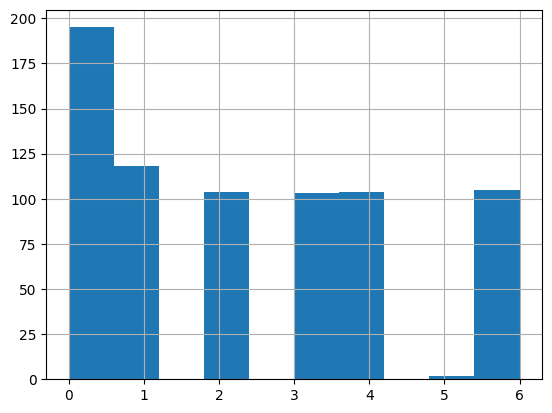

In [ ]:
day_df.difference_rentday.hist()

Explore day_df & hour_df

In [ ]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
all_df.groupby(by="weathersit_y").instant.nunique().sort_values(ascending=False).head(10)

,instant
weathersit_y,
1,420
2,247
3,63
4,1


In [ ]:
all_df.to_csv("all_data.csv", index=False)

**Insight:**
- Berdasarkan demografi pelanggan berdasarkan cuaca(weathersit), dihasilkan maximum, minimum, standar deviasi.
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat tren penyewaan sepeda di berbagai musim?

In [ ]:
all_df.sample(5)

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
464,465,2012-04-09,2,1,4,0,1,1,1,0.489167,...,5,1,1,0.20,0.1818,0.51,0.3582,7,159,166
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,...,3,1,1,0.34,0.3333,0.93,0.1642,1,74,75
679,680,2012-11-10,4,1,11,0,6,0,1,0.389167,...,1,1,2,0.16,0.1818,0.59,0.1343,3,41,44
400,401,2012-02-05,1,1,2,0,0,0,2,0.265833,...,2,1,2,0.22,0.2273,0.87,0.1940,0,61,61
169,170,2011-06-19,2,0,6,0,0,0,2,0.699167,...,6,0,3,0.16,0.1818,0.93,0.1045,0,15,15


In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,difference_rentday
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,6
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2


In [ ]:
# Membuat tabel rata-rata penyewaan berdasarkan musim
seasonal_rentals = day_df.groupby('season')['cnt'].mean().reset_index()
seasonal_rentals.columns = ['Season', 'Average Rentals']

# Menambahkan label nama musim untuk interpretasi
season_labels = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}
seasonal_rentals['Season Name'] = seasonal_rentals['Season'].map(season_labels)

print(seasonal_rentals)


   Season  Average Rentals   Season Name
0       1      2604.132597    Musim Semi
1       2      4992.331522   Musim Panas
2       3      5644.303191   Musim Gugur
3       4      4728.162921  Musim Dingin


<ipython-input-50-9eb20b3cb1a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


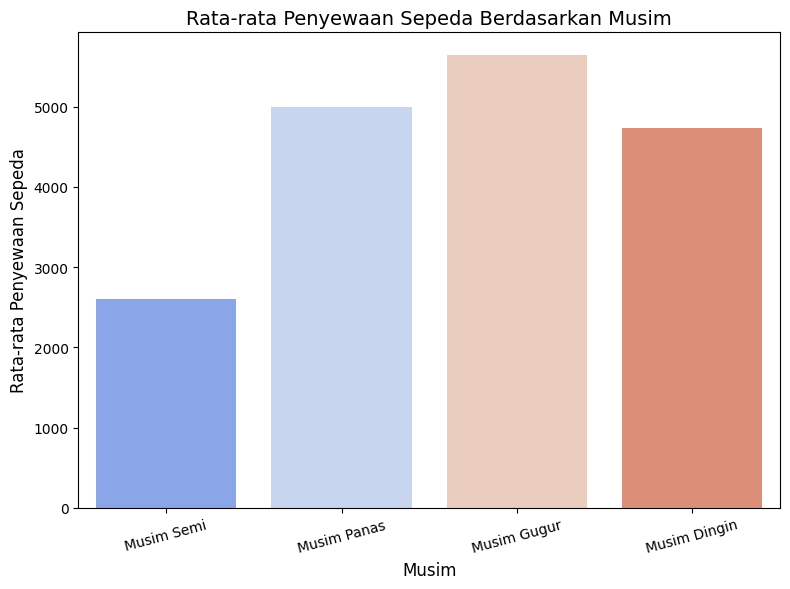

In [ ]:
plt.figure(figsize=(8, 6))

# Membuat bar plot
sns.barplot(
    x='Season Name',
    y='Average Rentals',
    data=seasonal_rentals,
    palette='coolwarm'
)

# Menambahkan judul dan label
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Insight:**
- Berdasarkan grafik di atas, terlihat bahwa pada saat musim gugur meraih rata-rata penyewaan sepeda terbanyak dan pada saat musim semi terdapat rata-rata penyewaan terendah

### Pertanyaan 2: Jam berapa dalam seminggu yang memiliki rata-rata penyewaan sepeda tertinggi?

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hourly_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()
hourly_rentals.columns = ['Hour', 'Average Rentals']

hourly_rentals = hourly_rentals.sort_values(by='Hour')

print(hourly_rentals)


    Hour  Average Rentals
0      0        53.898072
1      1        33.375691
2      2        22.869930
3      3        11.727403
4      4         6.352941
5      5        19.889819
6      6        76.044138
7      7       212.064649
8      8       359.011004
9      9       219.309491
10    10       173.668501
11    11       208.143054
12    12       253.315934
13    13       253.661180
14    14       240.949246
15    15       251.233196
16    16       311.983562
17    17       461.452055
18    18       425.510989
19    19       311.523352
20    20       226.030220
21    21       172.314560
22    22       131.335165
23    23        87.831044


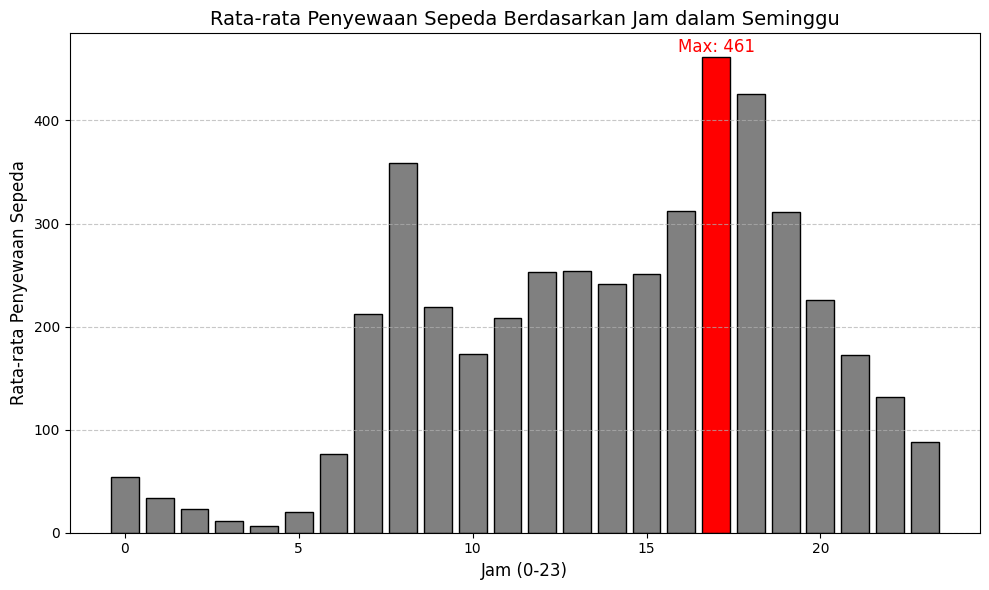

In [ ]:
plt.figure(figsize=(10, 6))

colors = ['gray' if avg < hourly_rentals['Average Rentals'].max() else 'red' for avg in hourly_rentals['Average Rentals']]

plt.bar(
    x=hourly_rentals['Hour'],
    height=hourly_rentals['Average Rentals'],
    color=colors,
    edgecolor='black'
)

plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Seminggu', fontsize=14)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)

max_hour = hourly_rentals.loc[hourly_rentals['Average Rentals'].idxmax()]
plt.text(
    max_hour['Hour'],
    max_hour['Average Rentals'] + 5,
    f'Max: {int(max_hour["Average Rentals"])}',
    color='red',
    fontsize=12,
    ha='center'
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Insight:**
- Berdasarkan grafik di atas, rata-rata penyewaan tertinggi antara jam 15-20


## Analisis Lanjutan (Opsional)

### RFM Analysis

In [ ]:
rfm_df = all_df.groupby(by="instant", as_index=False).agg({
    "dteday_x": "max",
    "instant": "nunique",
    "registered_y": "sum"
})
rfm_df.columns = ["instant", "max_dteday_x", "register"]
rfm_df.head()

,instant,max_dteday_x,register
0,2011-01-01,1,13
1,2011-01-02,1,32
2,2011-01-03,1,27
3,2011-01-04,1,10
4,2011-01-05,1,1


## Conclusion

- Dari pertanyaan ke-1 kolom yang dipakai untuk eksplorasi data dan visualisasi menggunakan kolom cnt dan kolom season dimana kolom cnt berfungsi untuk menentukan pengaruh terhadap penyewaan sepeda berdasarkan kolom season yang digunakan sebagai acuan perbedaan penyewaan sepeda pada setiap musim.
- Dari pertanyaan ke-2 kolom yang dipakai untuk eksplorasi data dan visualisasi menggunakan kolom hr dan kolom cnt. Kolom cnt digunakan sebagai pengaruh terhadap penyewaan sepeda dan kolom cnt digunakan sebagai perbedaan rata-rata penyewaan pada setiap waktu. Rata-rata tertinggi penyewaan sepeda diraih antara pukul 15-20